## 1.Import Library

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

# for visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from textwrap import wrap
# import holoviews as hv

# Testing
import scipy
import scipy.stats as st

# Modeling
import xgboost
from xgboost import XGBClassifier

import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb
from sklearn import model_selection
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Splitting Dataset
from sklearn.model_selection import train_test_split, cross_val_score

# Scoring
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold


%matplotlib inline
from textwrap import wrap

In [2]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

## 2.Data Collection

In [4]:
data = pd.read_csv('../Train.csv')
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


# 3.Data Description

The data contains the following information:

1.   ID: ID Number of Customers.

1.   Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.

1.   Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.

1.   Customer care calls: The number of calls made from enquiry for enquiry of the shipment.

1.   Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).

1.   Cost of the product: Cost of the Product in US Dollars.

1.   Prior purchases: The Number of Prior Purchase.

1.   Product importance: The company has categorized the product in the various parameter such as low, medium, high.

1.   Gender: Male and Female.

1.   Discount offered: Discount offered on that specific product.
1.   Weight in gms: It is the weight in grams.

1.   Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.


# 4 Data Understanding

## 4.1 General Information

In [5]:
#copy dataset to new dataframe
data_new = data.copy()
data_new.shape

(10999, 12)

In [6]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [7]:
data_new.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


## 4.2 Numerical Data

In [8]:
numerics = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
display(data_new.select_dtypes(include=numerics).columns)
print(data_new.select_dtypes(include=numerics).shape)
#save data numeric in data_num
data_num = data_new.select_dtypes(include=numerics)

Index(['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

(10999, 8)


In [9]:
data_num.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


## 4.3 Categorical Data

In [10]:
display(data_new.select_dtypes(include=['object']).columns)
print(data_new.select_dtypes(include=numerics).shape)
#save data numeric in data_num
data_cat = data_new.select_dtypes(include=['object'])

Index(['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], dtype='object')

(10999, 8)


In [11]:
data_cat.describe()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


# 5.EDA (Exploratory Data Analysis)


## 5.1 Univariate Analysis

### 5.1.1 Warehouse Block

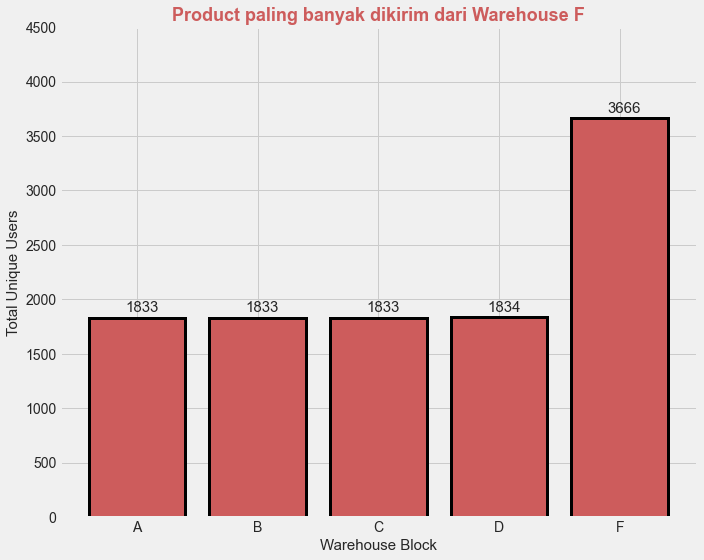

In [12]:
dfg = data_new.groupby(['Warehouse_block'])['ID'].nunique().reset_index(name='unique_customers')

x = dfg['Warehouse_block']
y = dfg['unique_customers']

plt.figure(figsize=(10,8))
barh = plt.bar(x=x, height=y, data=dfg, 
       color = 'indianred', # bar colors
       edgecolor= 'black', # edge bar colors
       linewidth = 3) # line width of bar

plt.title('Product paling banyak dikirim dari Warehouse F',color='indianred',fontsize=18,fontweight='bold')

plt.ylabel('Total Unique Users', fontsize=15) # y axis label
plt.xlabel('Warehouse Block', fontsize=15) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

x_numbers = range(len(x))
for i in x_numbers:
    plt.text(x = x_numbers[i]-0.1 , y = y[i]+50, s = round(y[i], 2), size = 15) # add data points

plt.ylim(0, 4500)
plt.tight_layout()
plt.savefig('../picture/warehouse_univariate.png', tight_box=True)

### 5.1.2 Mode Of Shipment

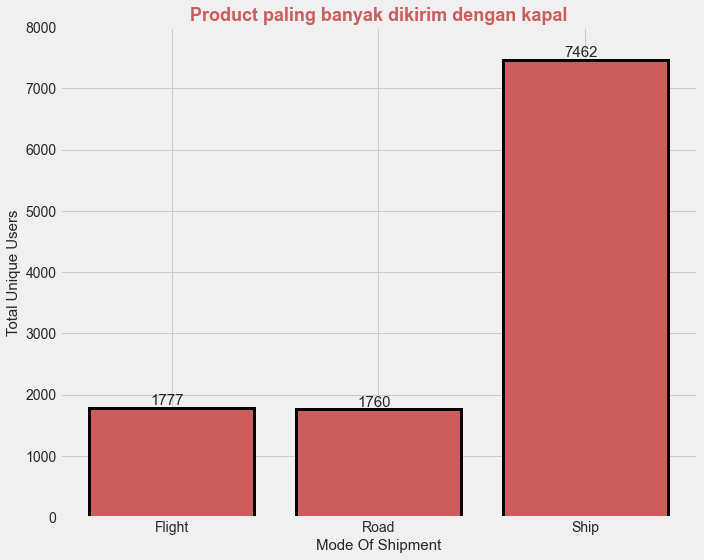

In [13]:
dfg = data_new.groupby(['Mode_of_Shipment'])['ID'].nunique().reset_index(name='unique_customers')

x = dfg['Mode_of_Shipment']
y = dfg['unique_customers']

plt.figure(figsize=(10,8))
barh = plt.bar(x=x, height=y, data=dfg, 
       color = 'indianred', # bar colors
       edgecolor= 'black', # edge bar colors
       linewidth = 3) # line width of bar

plt.title('Product paling banyak dikirim dengan kapal',color='indianred',fontsize=18,fontweight='bold')

plt.ylabel('Total Unique Users', fontsize=15) # y axis label
plt.xlabel('Mode Of Shipment', fontsize=15) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

x_numbers = range(len(x))
for i in x_numbers:
    plt.text(x = x_numbers[i]-0.1 , y = y[i]+50, s = round(y[i], 2), size = 15) # add data points

plt.ylim(0, 8000)
plt.tight_layout()
plt.savefig('../picture/shipment_univariate.png', tight_box=True)

### 5.1.3 Customer Calls

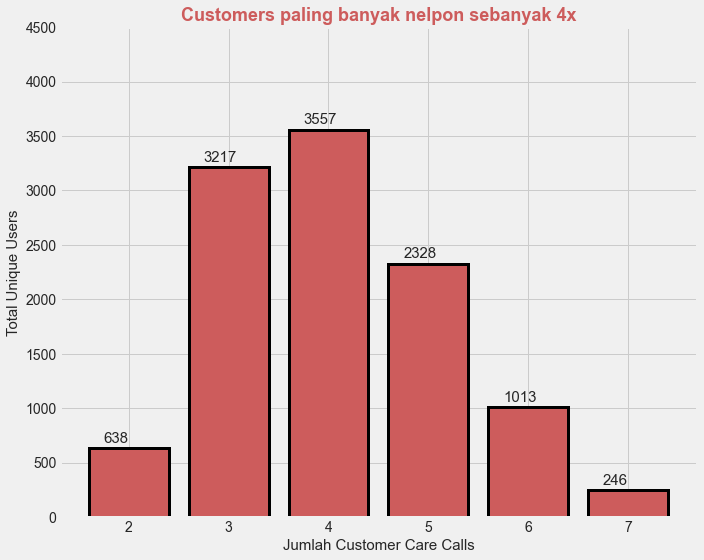

In [14]:
dfg = data_new.groupby(['Customer_care_calls'])['ID'].nunique().reset_index(name='unique_customers')

x = dfg['Customer_care_calls']
y = dfg['unique_customers']

plt.figure(figsize=(10,8))
barh = plt.bar(x=x, height=y, data=dfg, 
       color = 'indianred', # bar colors
       edgecolor= 'black', # edge bar colors
       linewidth = 3) # line width of bar

plt.title('Customers paling banyak nelpon sebanyak 4x',color='indianred',fontsize=18,fontweight='bold')

plt.ylabel('Total Unique Users', fontsize=15) # y axis label
plt.xlabel('Jumlah Customer Care Calls', fontsize=15) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

x_numbers = range(len(x))
for i in x_numbers:
    plt.text(x = x_numbers[i]+1.75 , y = y[i]+50, s = round(y[i], 2), size = 15) # add data points

plt.ylim(0, 4500)
plt.tight_layout()
plt.savefig('../picture/calls_univariate.png', tight_box=True)

### 5.1.4 Customer Rating

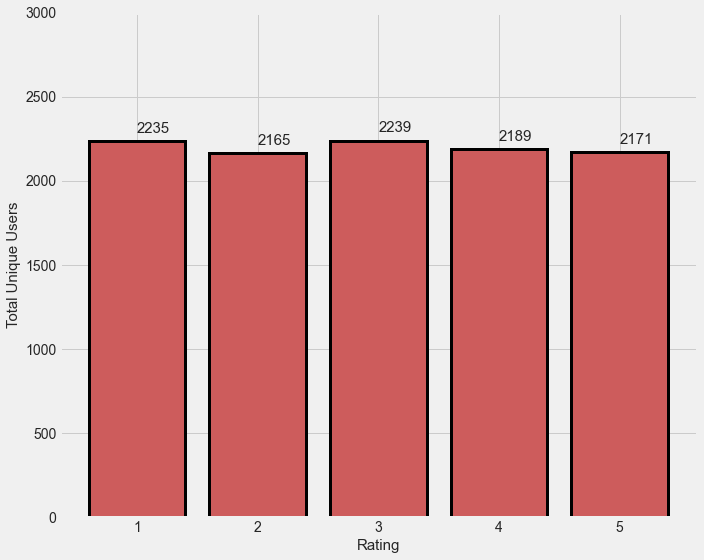

In [15]:
dfg = data_new.groupby(['Customer_rating'])['ID'].nunique().reset_index(name='unique_customers')

x = dfg['Customer_rating']
y = dfg['unique_customers']

plt.figure(figsize=(10,8))
barh = plt.bar(x=x, height=y, data=dfg, 
       color = 'indianred', # bar colors
       edgecolor= 'black', # edge bar colors
       linewidth = 3) # line width of bar

plt.title('',color='indianred',fontsize=18,fontweight='bold')

plt.ylabel('Total Unique Users', fontsize=15) # y axis label
plt.xlabel('Rating', fontsize=15) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

x_numbers = range(len(x))
for i in x_numbers:
    plt.text(x = x_numbers[i]+1 , y = y[i]+50, s = round(y[i], 2), size = 15) # add data points

plt.ylim(0, 3000)
plt.tight_layout()
plt.savefig('../picture/rating_univariate.png', tight_box=True)

### 5.1.5 Cost Of The Product

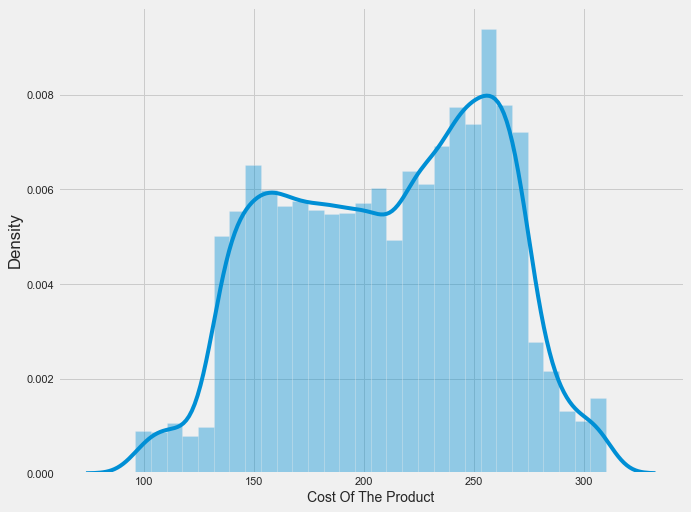

In [16]:
dfa = data_new.copy()
dfa['Cost_of_the_Product'] = pd.to_numeric(dfa['Cost_of_the_Product'], errors='coerce') # merubah data string to numerical
dfa.dropna(subset=['Cost_of_the_Product'], inplace=True) # membuang data null

plt.figure(figsize=(10,8))
sns.distplot(dfa['Cost_of_the_Product'])

plt.title('', fontsize=18, fontweight='bold')
plt.xlabel('Cost Of The Product', fontsize=14)
plt.savefig('../picture/cost_dist_univariate.png', tight_box=True)

### 5.1.6 Prior_purchases

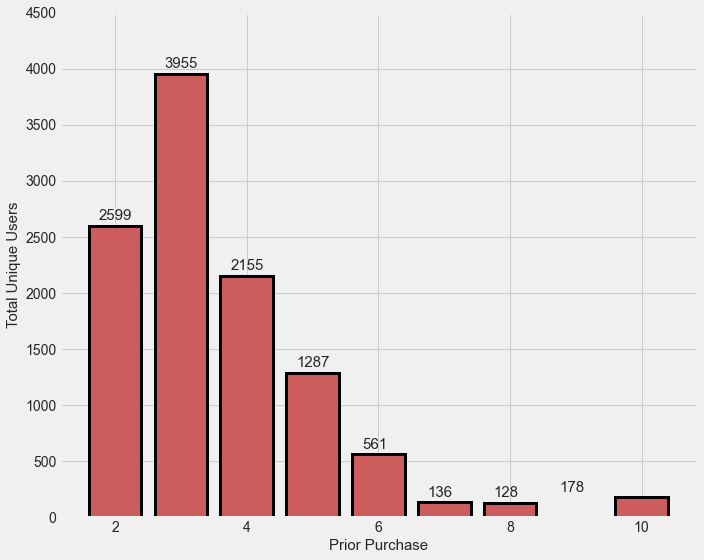

In [17]:
dfg = data_new.groupby(['Prior_purchases'])['ID'].nunique().reset_index(name='unique_customers')

x = dfg['Prior_purchases']
y = dfg['unique_customers']

plt.figure(figsize=(10,8))
barh = plt.bar(x=x, height=y, data=dfg, 
       color = 'indianred', # bar colors
       edgecolor= 'black', # edge bar colors
       linewidth = 3) # line width of bar

plt.title('',color='indianred',fontsize=18,fontweight='bold')

plt.ylabel('Total Unique Users', fontsize=15) # y axis label
plt.xlabel('Prior Purchase', fontsize=15) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

x_numbers = range(len(x))
for i in x_numbers:
    plt.text(x = x_numbers[i]+1.75 , y = y[i]+50, s = round(y[i], 2), size = 15) # add data points

plt.ylim(0, 4500)
plt.tight_layout()
plt.savefig('../picture/priorpurchase_univariate.png', tight_box=True)

### 5.1.7 Product Importance

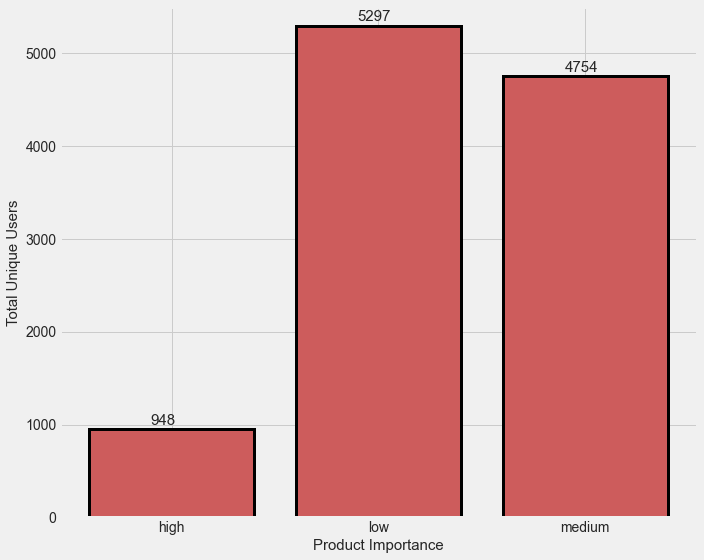

In [18]:
dfg = data_new.groupby(['Product_importance'])['ID'].nunique().reset_index(name='unique_customers')

x = dfg['Product_importance']
y = dfg['unique_customers']

plt.figure(figsize=(10,8))
barh = plt.bar(x=x, height=y, data=dfg, 
       color = 'indianred', # bar colors
       edgecolor= 'black', # edge bar colors
       linewidth = 3) # line width of bar

plt.title('',color='indianred',fontsize=18,fontweight='bold')

plt.ylabel('Total Unique Users', fontsize=15) # y axis label
plt.xlabel('Product Importance', fontsize=15) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

x_numbers = range(len(x))
for i in x_numbers:
    plt.text(x = x_numbers[i]-0.1 , y = y[i]+50, s = round(y[i], 2), size = 15) # add data points

plt.ylim(0, 5500)
plt.tight_layout()
plt.savefig('../picture/product_importance_univariate.png', tight_box=True)

### 5.1.8 Gender

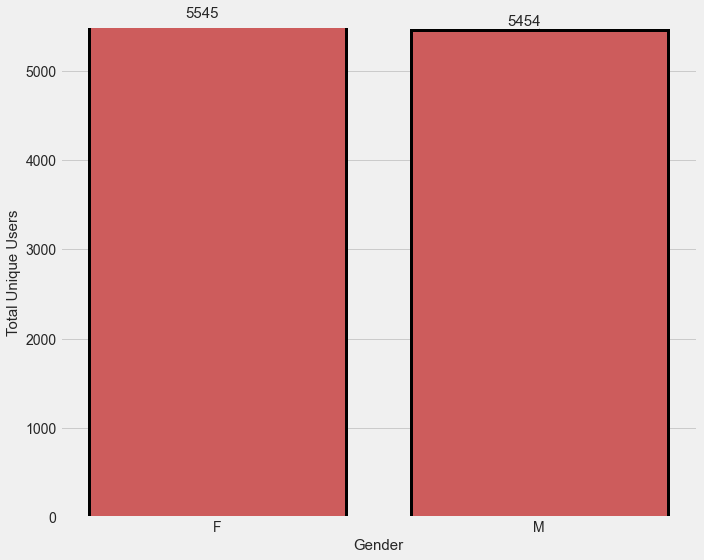

In [19]:
dfg = data_new.groupby(['Gender'])['ID'].nunique().reset_index(name='unique_customers')

x = dfg['Gender']
y = dfg['unique_customers']

plt.figure(figsize=(10,8))
barh = plt.bar(x=x, height=y, data=dfg, 
       color = 'indianred', # bar colors
       edgecolor= 'black', # edge bar colors
       linewidth = 3) # line width of bar

plt.title('',color='indianred',fontsize=18,fontweight='bold')

plt.ylabel('Total Unique Users', fontsize=15) # y axis label
plt.xlabel('Gender', fontsize=15) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

x_numbers = range(len(x))
for i in x_numbers:
    plt.text(x = x_numbers[i]-0.1 , y = y[i]+50, s = round(y[i], 2), size = 15) # add data points

plt.ylim(0, 5500)
plt.tight_layout()
plt.savefig('../picture/gender_univariate.png', tight_box=True)

### 5.1.9 Discount Offered

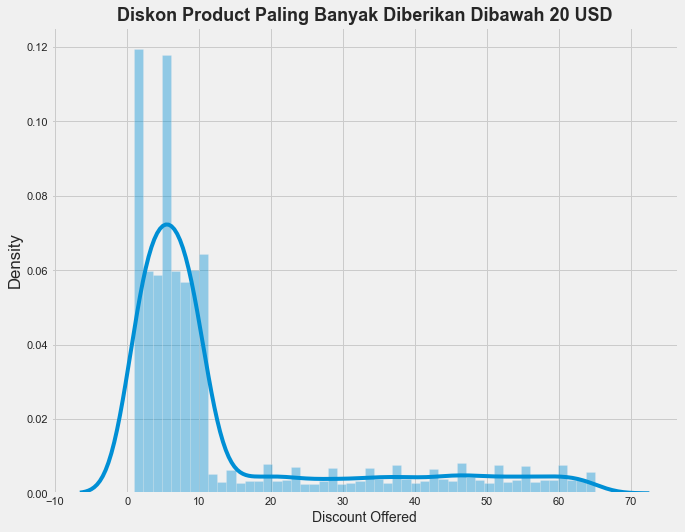

In [20]:
dfa['Discount_offered'] = pd.to_numeric(dfa['Discount_offered'], errors='coerce') # merubah data string to numerical
dfa.dropna(subset=['Discount_offered'], inplace=True) # membuang data null

plt.figure(figsize=(10,8))
sns.distplot(dfa['Discount_offered'])

plt.title('Diskon Product Paling Banyak Diberikan Dibawah 20 USD', fontsize=18, fontweight='bold')
plt.xlabel('Discount Offered', fontsize=14)
plt.savefig('../picture/discount_dist_univariate.png', tight_box=True)

### 5.1.10  Weight_in_gms 

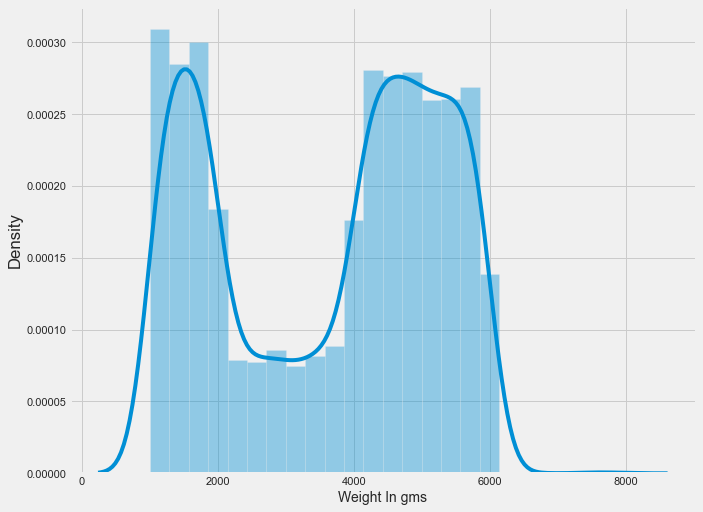

In [21]:
dfa['Weight_in_gms'] = pd.to_numeric(dfa['Weight_in_gms'], errors='coerce') 
dfa.dropna(subset=['Weight_in_gms'], inplace=True) 

plt.figure(figsize=(10,8))
sns.distplot(dfa['Weight_in_gms'])

plt.title('', fontsize=18, fontweight='bold')
plt.xlabel('Weight In gms', fontsize=14)
plt.savefig('../picture/weight_univariate.png', tight_box=True)

### 5.1.11 Reached On Time Yes or No

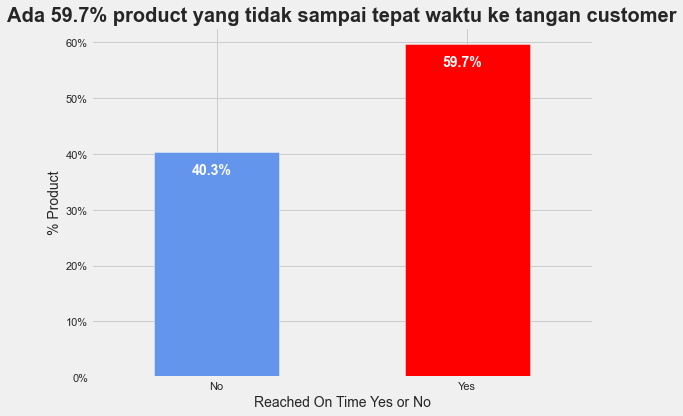

In [22]:
colors = ['red','cornflowerblue']
ax = (data_new['Reached.on.Time_Y.N'].value_counts()*100.0 /len(data_new)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Product',size = 14)
ax.set_xlabel('Reached On Time Yes or No',size = 14)
ax.set_xticklabels({'Yes', 'No'})
ax.set_title('Ada 59.7% product yang tidak sampai tepat waktu ke tangan customer', size = 20, fontweight='bold')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)
plt.savefig('../picture/reached_rate_univariate.png', tight_box=True)

## 5.2 Bivariate Analysis

### 5.2.1 Warehouse Block & Reached On Time Y.N

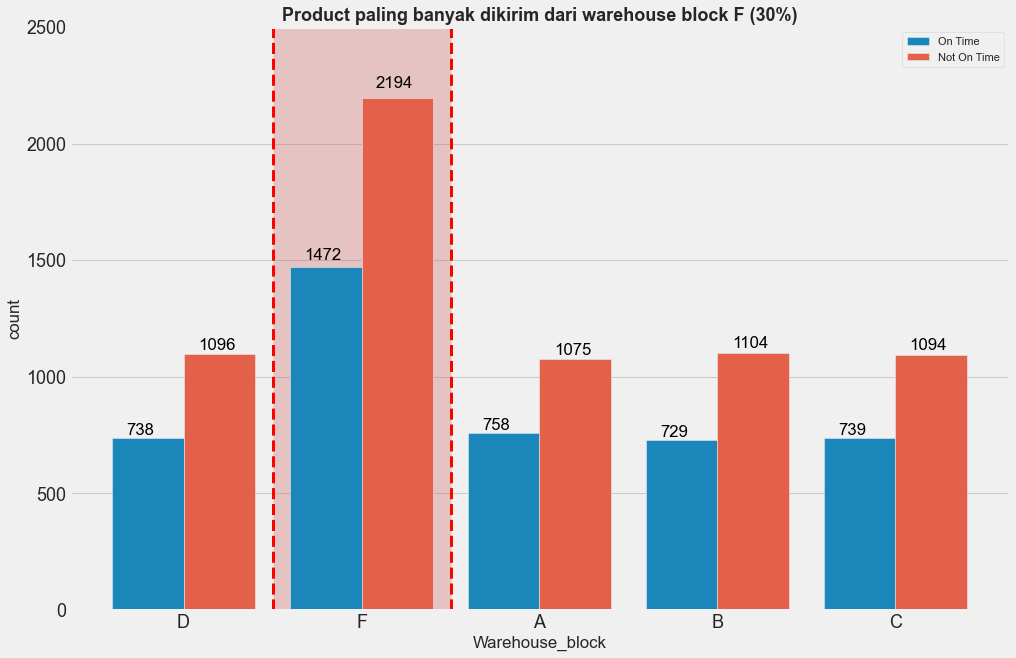

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))

ax = sns.countplot(x='Warehouse_block', hue='Reached.on.Time_Y.N', data=data_new, ax=ax)
ax.legend(["On Time","Not On Time"],loc='upper right')
ax.set_title('Product paling banyak dikirim dari warehouse block F (30%)', fontsize=18, fontweight='bold')
plt.ylim(0,2500)
plt.stackplot(np.arange(0.5, 2.5 ,1), [[5000]], colors=('indianred',), alpha=0.3)
plt.axvline(x=0.5, color='red', linestyle='--', linewidth=3)
plt.axvline(x=1.5, color='red', linestyle='--', linewidth=3)
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
for p in ax.patches:
    ax.text(p.get_x() + 0.08, 
            p.get_height() * 1.02, 
           '{0:.0f}'.format(p.get_height()),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='large')
plt.savefig('../picture/warehouse_reached.png', tight_box=True)

### 5.2.2 Mode Shipment & Reached On Time Y.N

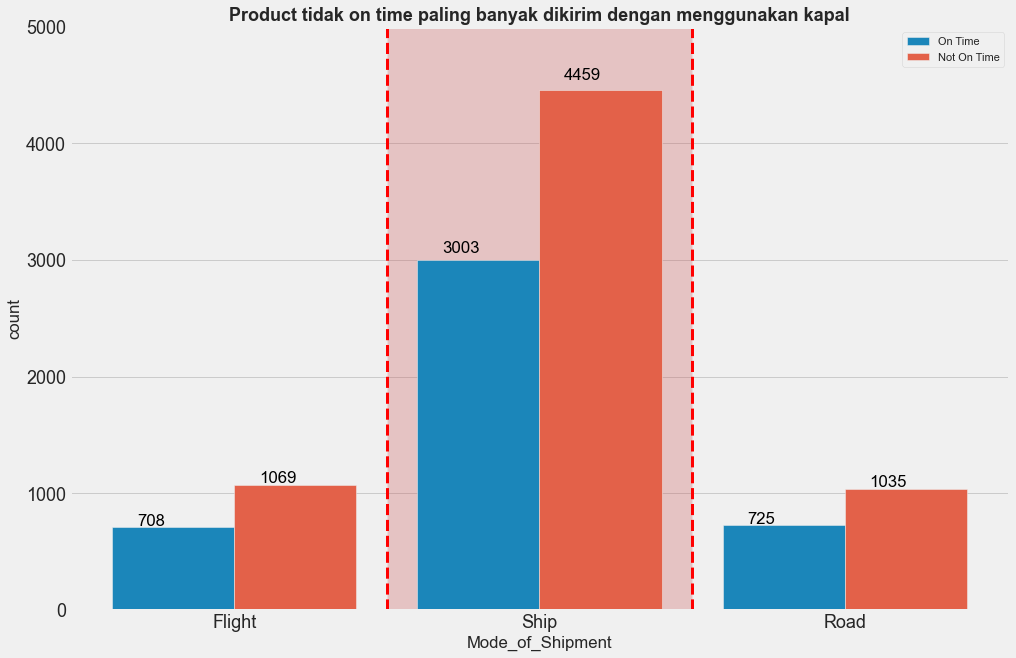

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))

ax = sns.countplot(x='Mode_of_Shipment', hue='Reached.on.Time_Y.N', data=data_new, ax=ax)
ax.legend(["On Time","Not On Time"],loc='upper right')

ax.set_title('Product tidak on time paling banyak dikirim dengan menggunakan kapal', fontsize=18, fontweight='bold')

plt.ylim(0,5000)
plt.stackplot(np.arange(0.5, 2.5 ,1), [[5000]], colors=('indianred',), alpha=0.3)
plt.axvline(x=0.5, color='red', linestyle='--', linewidth=3)
plt.axvline(x=1.5, color='red', linestyle='--', linewidth=3)
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
for p in ax.patches:
    ax.text(p.get_x() + 0.08, 
            p.get_height() * 1.02, 
           '{0:.0f}'.format(p.get_height()),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='large')
plt.savefig('../picture/shipment_reached.png', tight_box=True)

### 5.2.3 Customer Care Calls & Reached On Time Y.N

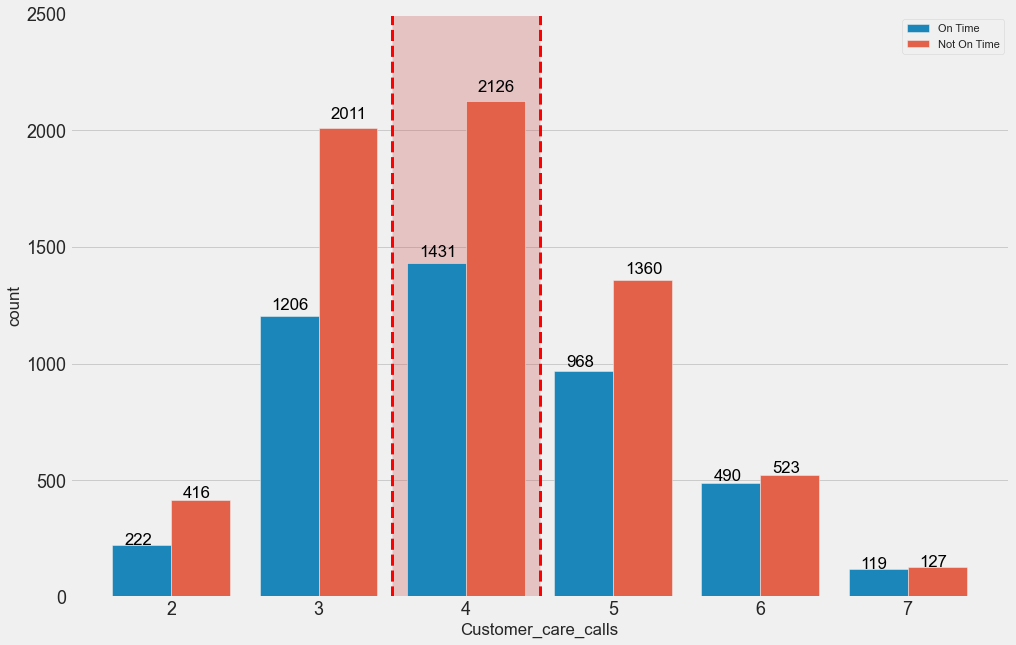

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))

ax = sns.countplot(x='Customer_care_calls', hue='Reached.on.Time_Y.N', data=data_new, ax=ax)
ax.legend(["On Time","Not On Time"],loc='upper right')

ax.set_title('', fontsize=18, fontweight='bold')

plt.ylim(0,2500)
plt.stackplot(np.arange(1.5, 3.5 ,1), [[5000]], colors=('indianred',), alpha=0.3)
plt.axvline(x=1.5, color='red', linestyle='--', linewidth=3)
plt.axvline(x=2.5, color='red', linestyle='--', linewidth=3)
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
for p in ax.patches:
    ax.text(p.get_x() + 0.08, 
            p.get_height() * 1.02, 
           '{0:.0f}'.format(p.get_height()),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='large')
plt.savefig('../picture/calls_reached.png', tight_box=True)

### 5.2.4 Customer Rating & Reached On Time Y.N

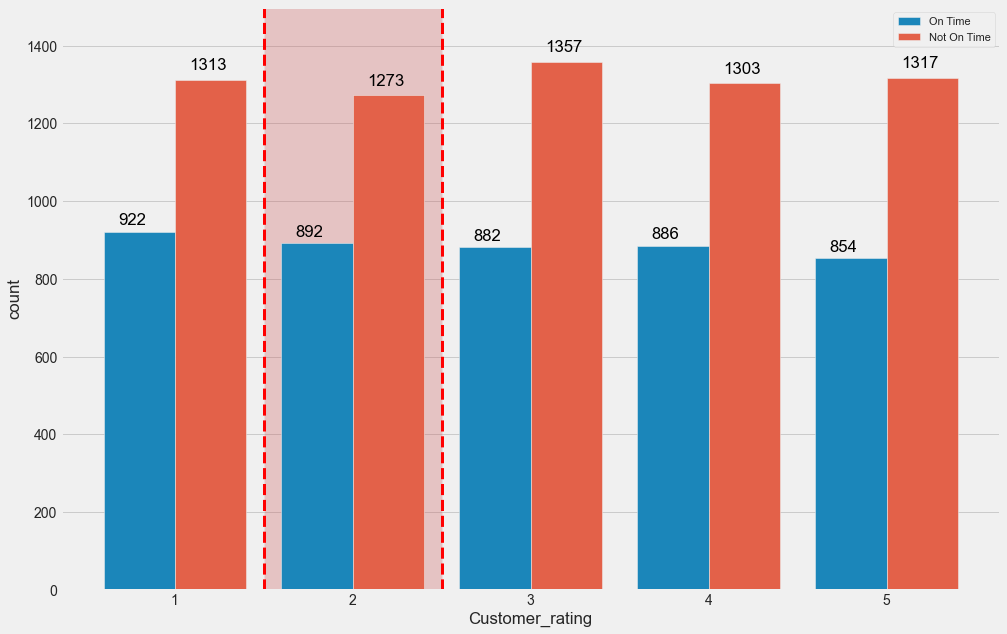

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))

ax = sns.countplot(x='Customer_rating', hue='Reached.on.Time_Y.N', data=data_new, ax=ax)
ax.legend(["On Time","Not On Time"],loc='upper right')

ax.set_title('', fontsize=18, fontweight='bold')

plt.ylim(0,1500)
plt.stackplot(np.arange(0.5, 2.5 ,1), [[5000]], colors=('indianred',), alpha=0.3)
plt.axvline(x=0.5, color='red', linestyle='--', linewidth=3)
plt.axvline(x=1.5, color='red', linestyle='--', linewidth=3)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
for p in ax.patches:
    ax.text(p.get_x() + 0.08, 
            p.get_height() * 1.02, 
           '{0:.0f}'.format(p.get_height()),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='large')
plt.savefig('../picture/rating_reached.png', tight_box=True)

### 5.2.5 Cost Of The Product & Reached On Time Y.N

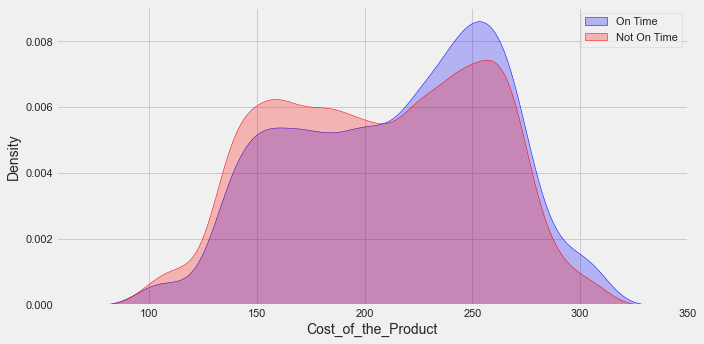

In [27]:
fig, ax = plt.subplots(figsize=(10, 5))

ax = sns.kdeplot(data_new[(data_new['Reached.on.Time_Y.N'] == 0)]['Cost_of_the_Product'].dropna(),
                color="Blue", shade = True)
ax = sns.kdeplot(data_new[(data_new['Reached.on.Time_Y.N'] == 1)]['Cost_of_the_Product'].dropna(),
                ax =ax, color="Red", shade= True)
ax.legend(["On Time","Not On Time"],loc='upper right')
ax.set_ylabel('Density', fontsize=14)
ax.set_xlabel('Cost_of_the_Product', fontsize=14)
ax.set_title('', fontsize=18, fontweight='bold')

plt.tight_layout()
plt.savefig('../picture/cost_reached.png', tight_box=True)

### 5.2.6 Prior Purchase & Reached On Time Y.N

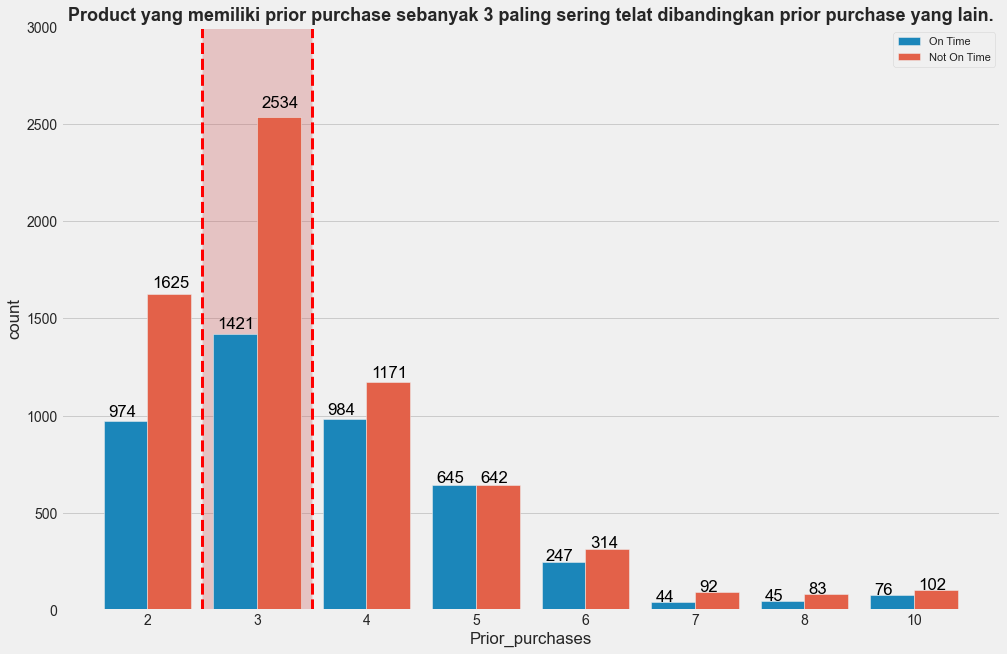

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))

ax = sns.countplot(x='Prior_purchases', hue='Reached.on.Time_Y.N', data=data_new, ax=ax)
ax.legend(["On Time","Not On Time"],loc='upper right')
ax.set_title('Product yang memiliki prior purchase sebanyak 3 paling sering telat dibandingkan prior purchase yang lain.', fontsize=18, fontweight='bold')
plt.ylim(0,3000)
plt.stackplot(np.arange(0.5, 2.5 ,1), [[5000]], colors=('indianred',), alpha=0.3)
plt.axvline(x=0.5, color='red', linestyle='--', linewidth=3)
plt.axvline(x=1.5, color='red', linestyle='--', linewidth=3)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
for p in ax.patches:
    ax.text(p.get_x() + 0.04, 
            p.get_height() * 1.02, 
           '{0:.0f}'.format(p.get_height()),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='large')
plt.savefig('../picture/prior_reached.png', tight_box=True)

In [29]:
dfg4 = data_new.groupby(['Prior_purchases','Reached.on.Time_Y.N'])['ID'].count().reset_index(name='jumlah')
dfg4['total'] = dfg4.groupby(['Prior_purchases'])['jumlah'].transform('sum')
dfg4['Persentage'] = dfg4['jumlah']/dfg4['total']*100
dfg4


,Prior_purchases,Reached.on.Time_Y.N,jumlah,total,Persentage
0,2,0,974,2599,37.475952
1,2,1,1625,2599,62.524048
2,3,0,1421,3955,35.929204
3,3,1,2534,3955,64.070796
4,4,0,984,2155,45.661253
5,4,1,1171,2155,54.338747
6,5,0,645,1287,50.116550
7,5,1,642,1287,49.883450
8,6,0,247,561,44.028520
9,6,1,314,561,55.971480


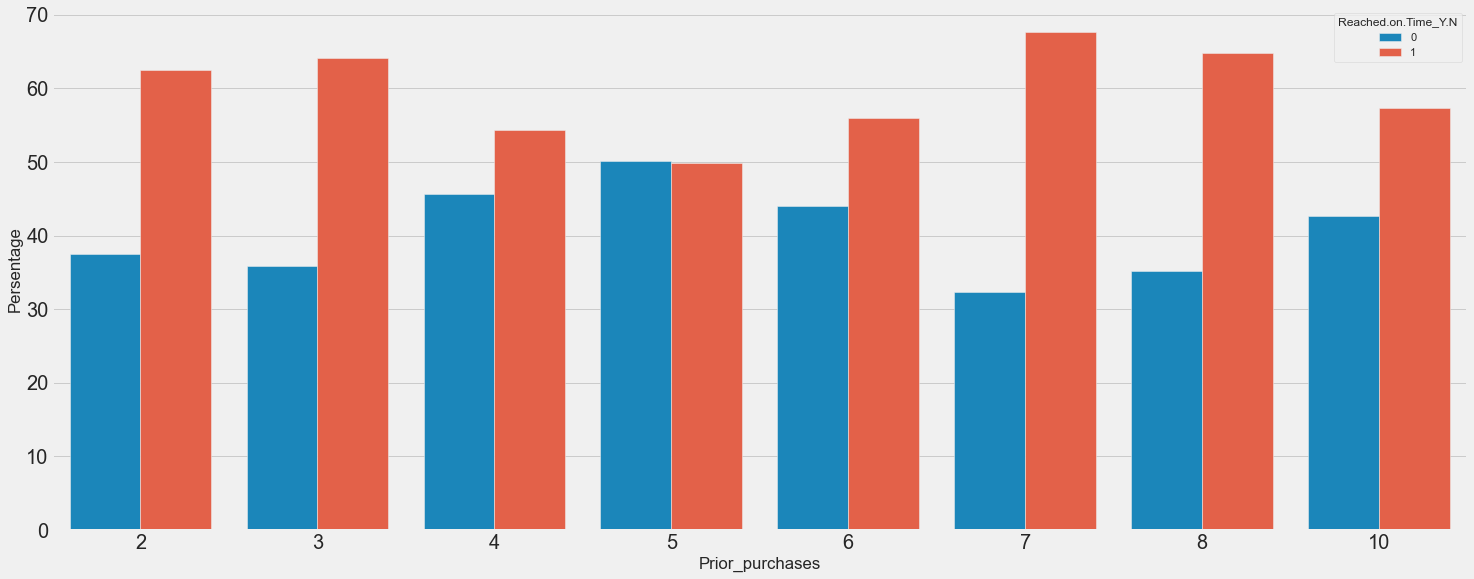

In [30]:
# Berdasarkan Percentage

sns.barplot(x='Prior_purchases', y='Persentage', hue='Reached.on.Time_Y.N', data=dfg4)

plt.tick_params(axis = 'both', which = 'major', labelsize = 20);

plt.tight_layout()
#plt.savefig('picture/percentage_PP', tight_box=True);

### 5.2.7 Product Importance & Reached On Time Y.N

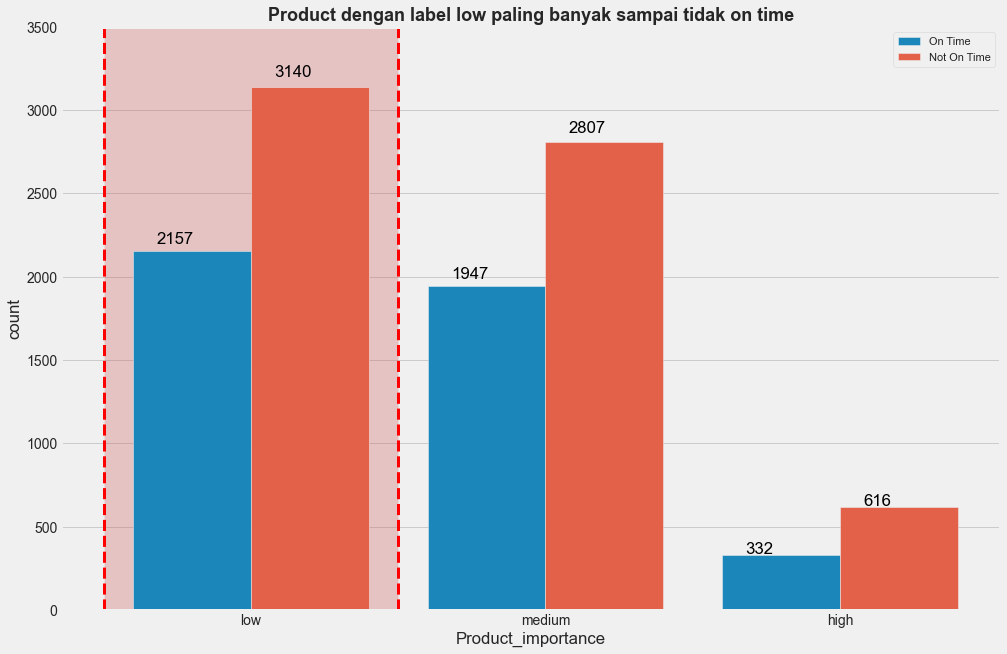

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))

ax = sns.countplot(x='Product_importance', hue='Reached.on.Time_Y.N', data=data_new, ax=ax)
ax.legend(["On Time","Not On Time"],loc='upper right')
ax.set_title('Product dengan label low paling banyak sampai tidak on time', fontsize=18, fontweight='bold')
plt.ylim(0,3500)
plt.stackplot(np.arange(-0.5, 1.5 ,1), [[5000]], colors=('indianred',), alpha=0.3)
plt.axvline(x=-0.5, color='red', linestyle='--', linewidth=3)
plt.axvline(x=0.5, color='red', linestyle='--', linewidth=3)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
for p in ax.patches:
    ax.text(p.get_x() + 0.08, 
            p.get_height() * 1.02, 
           '{0:.0f}'.format(p.get_height()),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='large')
plt.savefig('../picture/product_importance_reached.png', tight_box=True)

### 5.2.8 Gender & Reached On Time Y.N

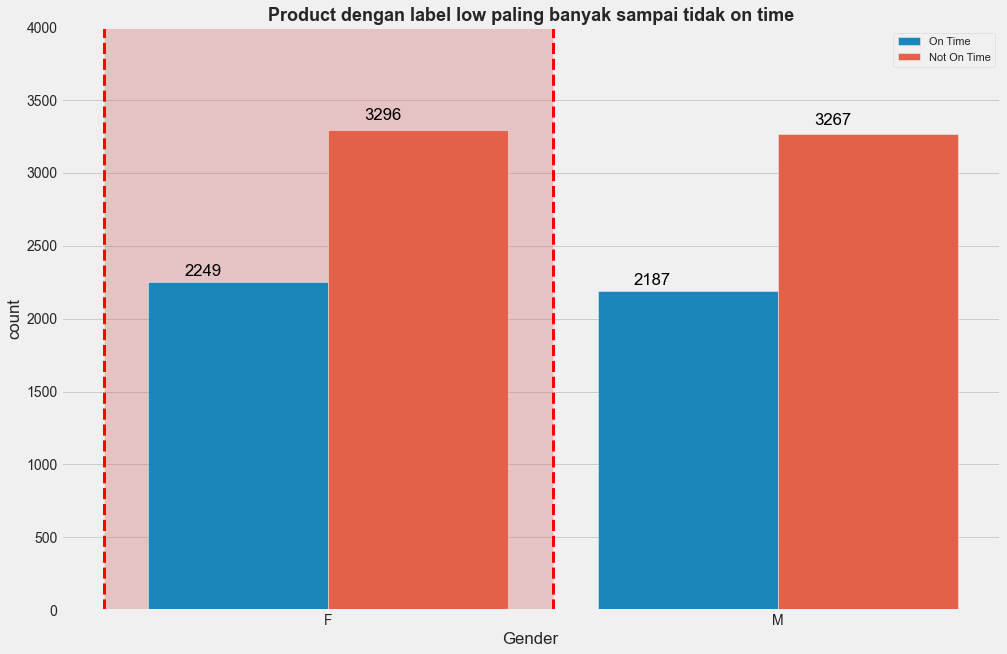

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))

ax = sns.countplot(x='Gender', hue='Reached.on.Time_Y.N', data=data_new, ax=ax)
ax.legend(["On Time","Not On Time"],loc='upper right')
ax.set_title('Product dengan label low paling banyak sampai tidak on time', fontsize=18, fontweight='bold')
plt.ylim(0,4000)
plt.stackplot(np.arange(-0.5, 1.5 ,1), [[5000]], colors=('indianred',), alpha=0.3)
plt.axvline(x=-0.5, color='red', linestyle='--', linewidth=3)
plt.axvline(x=0.5, color='red', linestyle='--', linewidth=3)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
for p in ax.patches:
    ax.text(p.get_x() + 0.08, 
            p.get_height() * 1.02, 
           '{0:.0f}'.format(p.get_height()),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='large')
plt.savefig('../picture/gender_reached.png', tight_box=True)

### 5.2.9 Discount Offered & Reached On Time Y.N

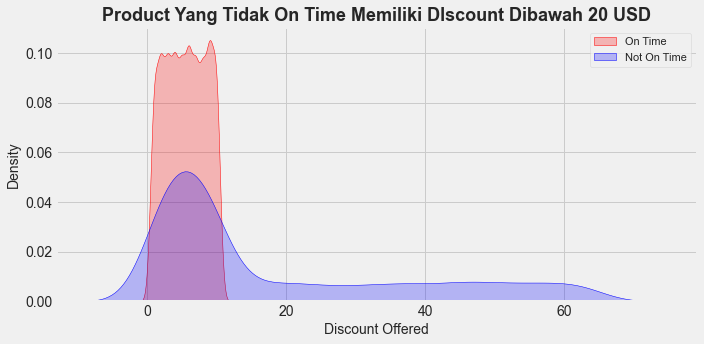

In [33]:
fig, ax = plt.subplots(figsize=(10, 5))

ax = sns.kdeplot(data_new[(data_new['Reached.on.Time_Y.N'] == 0)]['Discount_offered'].dropna(),
                color="Red", shade = True)
ax = sns.kdeplot(data_new[(data_new['Reached.on.Time_Y.N'] == 1)]['Discount_offered'].dropna(),
                ax =ax, color="Blue", shade= True)
ax.legend(["On Time","Not On Time"],loc='upper right')
ax.set_ylabel('Density', fontsize=14)
ax.set_xlabel('Discount Offered', fontsize=14)
ax.set_title('Product Yang Tidak On Time Memiliki DIscount Dibawah 20 USD', fontsize=18, fontweight='bold')
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.tight_layout()
plt.savefig('../picture/discount_reached.png', tight_box=True)

### 5.2.10 Discount Offered & Reached On Time Y.N

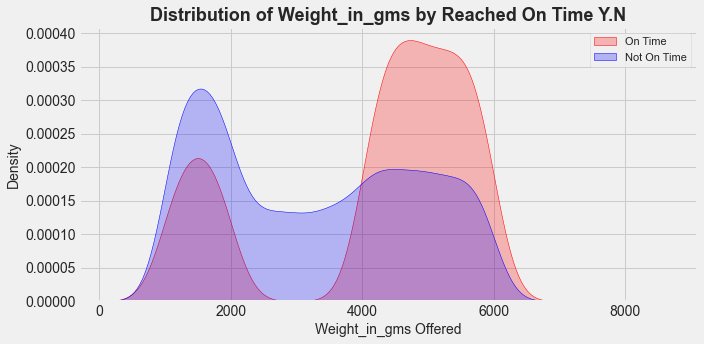

In [34]:
fig, ax = plt.subplots(figsize=(10, 5))

ax = sns.kdeplot(data_new[(data_new['Reached.on.Time_Y.N'] == 0)]['Weight_in_gms'].dropna(),
                color="Red", shade = True)
ax = sns.kdeplot(data_new[(data_new['Reached.on.Time_Y.N'] == 1)]['Weight_in_gms'].dropna(),
                ax =ax, color="Blue", shade= True)
ax.legend(["On Time","Not On Time"],loc='upper right')
ax.set_ylabel('Density', fontsize=14)
ax.set_xlabel('Weight_in_gms Offered', fontsize=14)
ax.set_title('Distribution of Weight_in_gms by Reached On Time Y.N', fontsize=18, fontweight='bold')
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.tight_layout()
plt.savefig('../picture/weight_reached.png', tight_box=True)

## 5.3 Multivariate Analysis

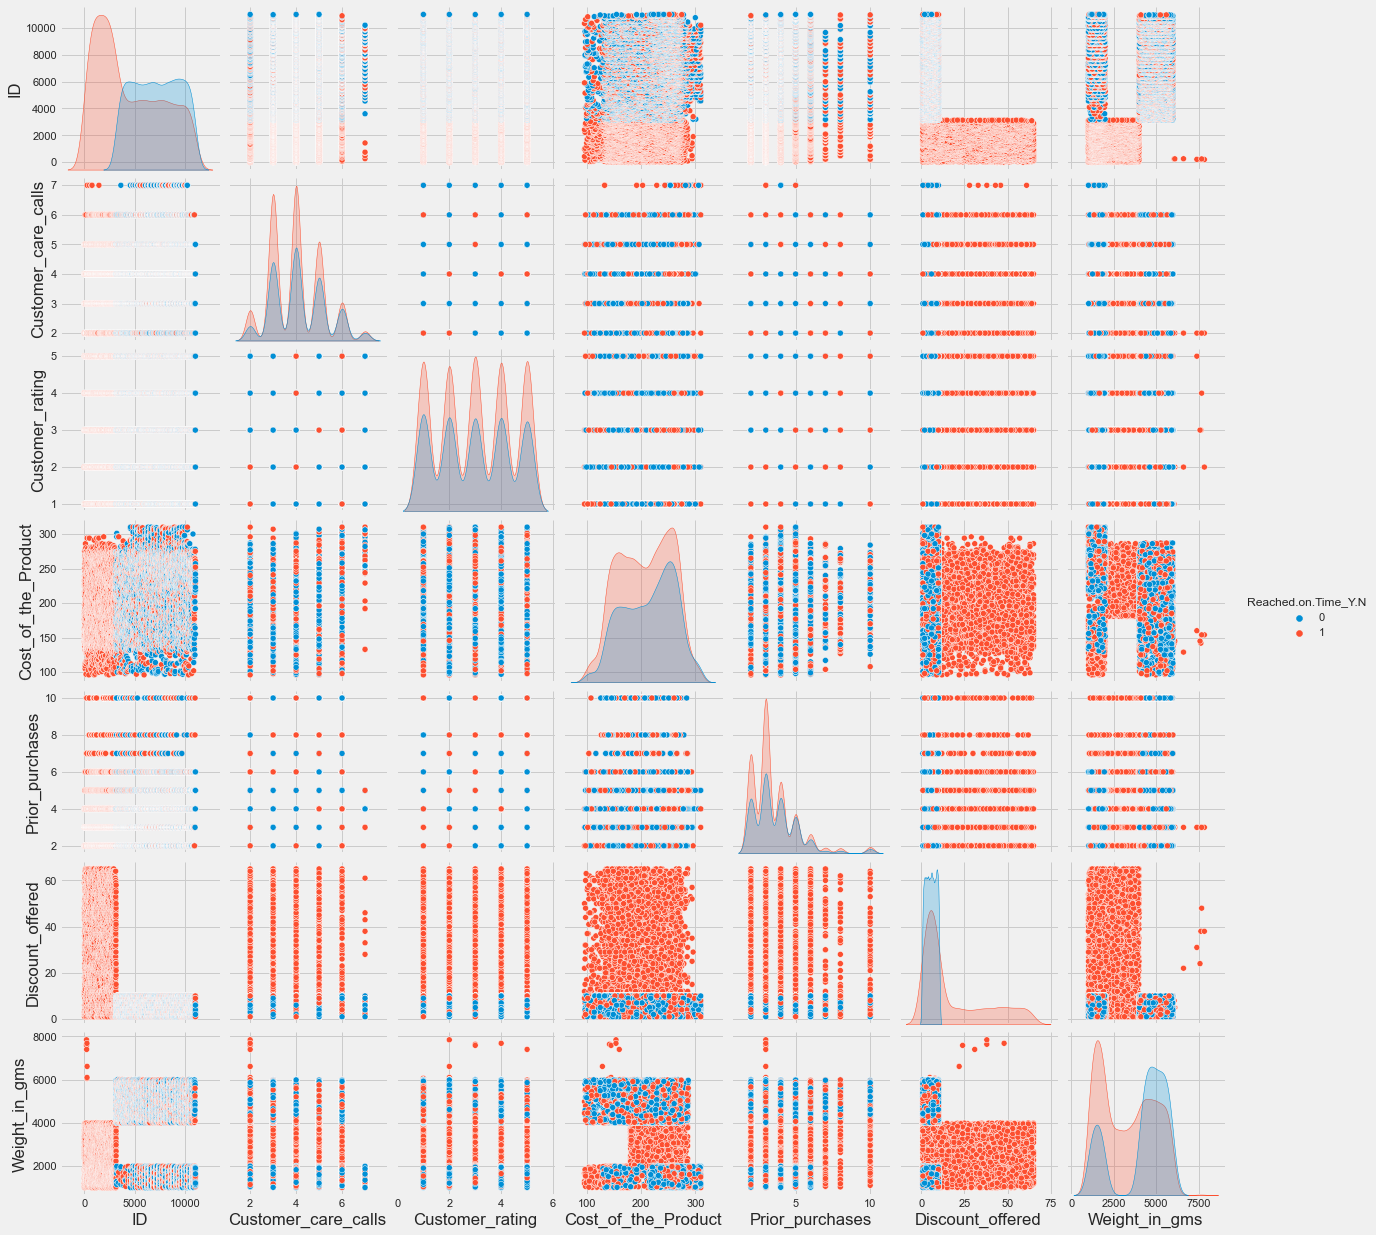

In [35]:

sns.pairplot(data_new, hue='Reached.on.Time_Y.N', diag_kind='kde')
plt.savefig('../picture/multivariate.png', tight_box=True)

# 6.Pre-Processing

### 6.1 Missing Value

In [36]:
data_new.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

### 6.2 Duplicate Value

In [37]:
data_new.duplicated().sum()

0

### 6.3.Outliers

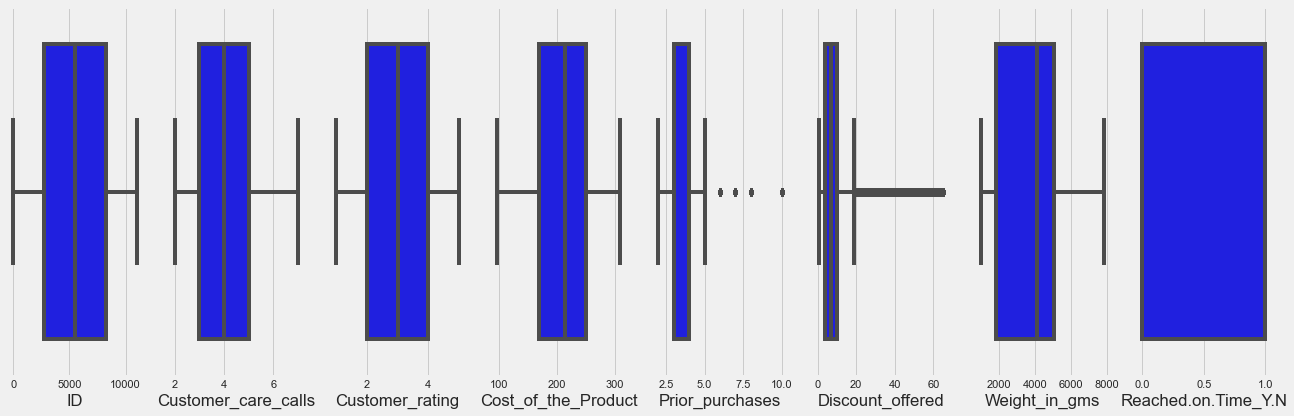

In [38]:
data_num = data_num.columns
features = data_num
plt.figure(figsize=(18,6))
for i in range(0, len(features)):
    plt.subplot(1,8,i+1)
    sns.boxplot(x=data_new[features[i]],color='blue', orient='h')
    plt.tight_layout()
plt.savefig('../picture/outliers.png', tight_box=True)

#### 6.3.1Handling Ouliers 

In [39]:
# data_new['Discount_offered'] = np.log(data_new['Discount_offered'])
# plt.hist(data_new['Discount_offered'])
## Tidak Digunakan Karena Tidak Berpengaruh Pada Modelling

### 6.4 Feature Engineering

Saat melakukan modelling dengan dataset original, score model yang didapatkan tidak sesuai dengan yang diharapkan (AUC score 0.69), maka kami memutuskan untuk menambah feature untuk menaikkan performa model.

#### 6.4.1 Cost Product Group

In [40]:
#Grouping Cost_of_the_Product
def cost_group(x):
    if x['Cost_of_the_Product'] <= 100 :
        cost_group = 'less= 100'
    elif x['Cost_of_the_Product'] > 100 and x['Cost_of_the_Product'] <= 150 :
        cost_group = '101-150'
    elif x['Cost_of_the_Product'] > 150 and x['Cost_of_the_Product'] <= 300 :
        cost_group = '151-300'
    else:
        cost_group = 'more 300'
    return cost_group
data_new['cost_group']= data_new.apply(lambda x: cost_group(x), axis=1)
data_new.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,cost_group
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,151-300
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,151-300
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,151-300
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,151-300
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,151-300


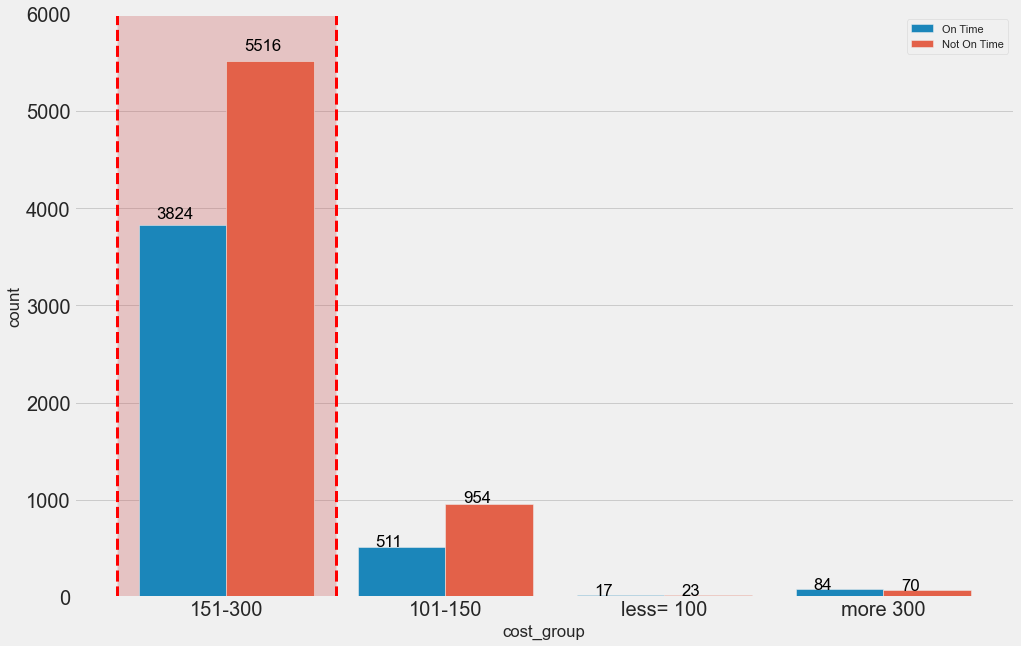

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))

ax = sns.countplot(x='cost_group', hue='Reached.on.Time_Y.N', data=data_new, ax=ax)
ax.legend(["On Time","Not On Time"],loc='upper right')
ax.set_title('', fontsize=18, fontweight='bold')
plt.ylim(0,6000)
plt.stackplot(np.arange(-0.5, 1.25 ,1), [[6000]], colors=('indianred',), alpha=0.3)
plt.axvline(x=-0.5, color='red', linestyle='--', linewidth=3)
plt.axvline(x= 0.5, color='red', linestyle='--', linewidth=3)
plt.tick_params(axis = 'both', which = 'major', labelsize = 20)
for p in ax.patches:
    ax.text(p.get_x() + 0.08, 
            p.get_height() * 1.02, 
           '{0:.0f}'.format(p.get_height()),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='large')
plt.savefig('../picture/cost_group_reached.png', tight_box=True)

#### 6.4.2 Discount Product Group

In [42]:
def discount_group(x):
    if x['Discount_offered'] <= 15 :
        discount_group = '1-15'
    elif x['Discount_offered'] > 15 and x['Discount_offered'] <= 30 :
        discount_group = '16-30'
    elif x['Discount_offered'] > 30 and x['Discount_offered'] <= 45 :
        discount_group = '31-45'
    elif x['Discount_offered'] > 45 and x['Discount_offered'] <= 60 :
        discount_group = '46-60'
    else:
        discount_group = 'more 60'
    return discount_group

data_new['discount_group']= data_new.apply(lambda x: discount_group(x), axis=1)
data_new.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,cost_group,discount_group
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,151-300,31-45
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,151-300,46-60
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,151-300,46-60
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,151-300,1-15
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,151-300,46-60


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


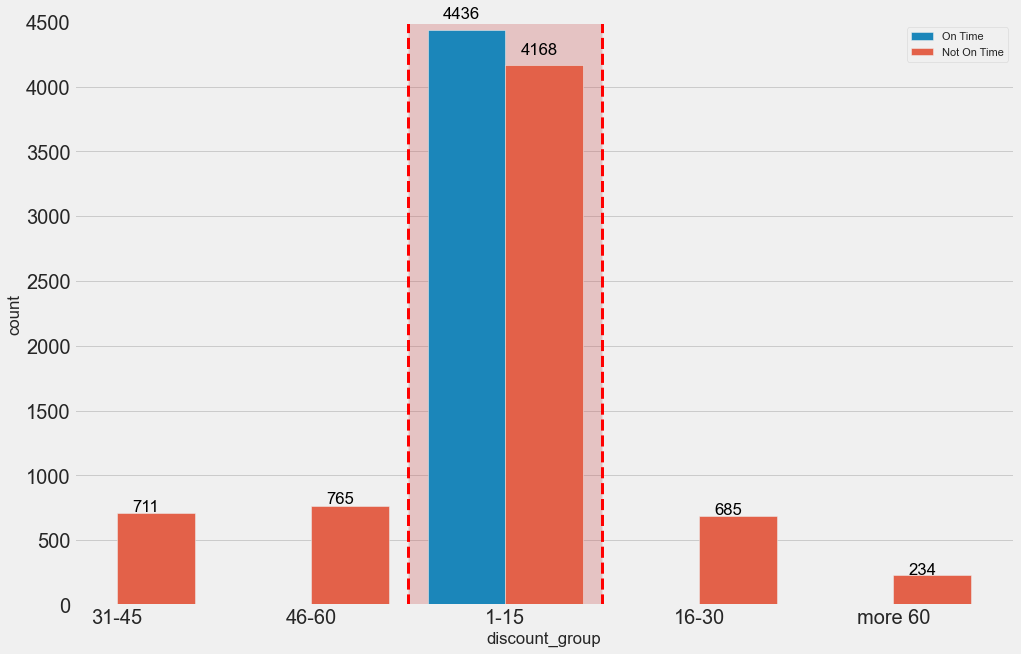

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))

ax = sns.countplot(x='discount_group', hue='Reached.on.Time_Y.N', data=data_new, ax=ax)
ax.legend(["On Time","Not On Time"],loc='upper right')
ax.set_title('', fontsize=18, fontweight='bold')
plt.ylim(0,4500)
plt.stackplot(np.arange(1.5, 3.5 ,1), [[4500]], colors=('indianred',), alpha=0.3)
plt.axvline(x=1.5, color='red', linestyle='--', linewidth=3)
plt.axvline(x=2.5, color='red', linestyle='--', linewidth=3)
plt.tick_params(axis = 'both', which = 'major', labelsize = 20)
for p in ax.patches:
    ax.text(p.get_x() + 0.08, 
            p.get_height() * 1.02, 
           '{0:.0f}'.format(p.get_height()),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='large')
plt.savefig('../picture/discount_group_reached.png', tight_box=True)

#### 6.4.3 Weight Product Group

In [44]:
def weight_group(x):
    if x['Weight_in_gms'] <= 2000 :
        weight_group = '0-2000'
    elif x['Weight_in_gms'] > 2000 and x['Weight_in_gms'] <= 4000 :
        weight_group = '2001-4000'
    elif x['Weight_in_gms'] > 4000 and x['Weight_in_gms'] <= 6000 :
        weight_group = '4001-6000'
    else:
        weight_group = '6001-8000'
    return weight_group

data_new['weight_group']= data_new.apply(lambda x: weight_group(x), axis=1)
data_new.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,cost_group,discount_group,weight_group
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,151-300,31-45,0-2000
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,151-300,46-60,2001-4000
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,151-300,46-60,2001-4000
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,151-300,1-15,0-2000
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,151-300,46-60,2001-4000


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


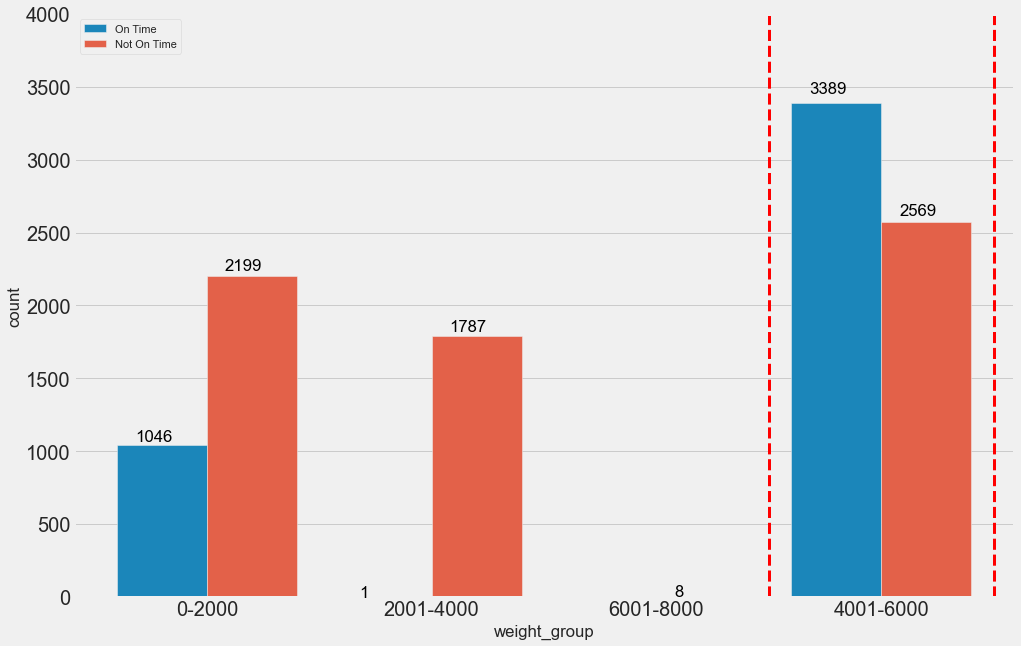

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))

ax = sns.countplot(x='weight_group', hue='Reached.on.Time_Y.N', data=data_new, ax=ax)
ax.legend(["On Time","Not On Time"],loc='upper left')
ax.set_title('', fontsize=18, fontweight='bold')
plt.ylim(0,4000)
plt.stackplot(np.arange(1.5, 1.5 ,1), [[6000]], colors=('indianred',), alpha=0.3)
plt.axvline(x=2.5, color='red', linestyle='--', linewidth=3)
plt.axvline(x=3.5, color='red', linestyle='--', linewidth=3)
plt.tick_params(axis = 'both', which = 'major', labelsize = 20)
for p in ax.patches:
    ax.text(p.get_x() + 0.08, 
            p.get_height() * 1.02, 
           '{0:.0f}'.format(p.get_height()),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='large')
plt.savefig('../picture/weight_group_reached.png', tight_box=True)

In [46]:
data_new[data_new['discount_group']=='1-5']

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,cost_group,discount_group,weight_group


## 6.5 Reformat Label

In [47]:
gender = {'F': 0, 'M': 1}
data_new['Gender'] = data_new['Gender'].map(gender)
data_new

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,cost_group,discount_group,weight_group
0,1,D,Flight,4,2,177,3,low,0,44,1233,1,151-300,31-45,0-2000
1,2,F,Flight,4,5,216,2,low,1,59,3088,1,151-300,46-60,2001-4000
2,3,A,Flight,2,2,183,4,low,1,48,3374,1,151-300,46-60,2001-4000
3,4,B,Flight,3,3,176,4,medium,1,10,1177,1,151-300,1-15,0-2000
4,5,C,Flight,2,2,184,3,medium,0,46,2484,1,151-300,46-60,2001-4000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,0,1,1538,1,151-300,1-15,0-2000
10995,10996,B,Ship,4,1,232,5,medium,0,6,1247,0,151-300,1-15,0-2000
10996,10997,C,Ship,5,4,242,5,low,0,4,1155,0,151-300,1-15,0-2000
10997,10998,F,Ship,5,2,223,6,medium,1,2,1210,0,151-300,1-15,0-2000


## 6.6 One Hot Encoding

In [48]:
data_new_dummies = pd.get_dummies(data_new[['Product_importance',
                                           'Warehouse_block',
                                           'Mode_of_Shipment',
                                             'discount_group', 
                                             'weight_group',
                                             'cost_group'
                                            ]])
#Concat feature yang telah di-encoding dan simpan di dataframe baru 'data_new_d'
data_new_d = pd.concat([data_new, data_new_dummies], axis=1)
data_new_d.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,...,discount_group_46-60,discount_group_more 60,weight_group_0-2000,weight_group_2001-4000,weight_group_4001-6000,weight_group_6001-8000,cost_group_101-150,cost_group_151-300,cost_group_less= 100,cost_group_more 300
0,1,D,Flight,4,2,177,3,low,0,44,...,0,0,1,0,0,0,0,1,0,0
1,2,F,Flight,4,5,216,2,low,1,59,...,1,0,0,1,0,0,0,1,0,0
2,3,A,Flight,2,2,183,4,low,1,48,...,1,0,0,1,0,0,0,1,0,0
3,4,B,Flight,3,3,176,4,medium,1,10,...,0,0,1,0,0,0,0,1,0,0
4,5,C,Flight,2,2,184,3,medium,0,46,...,1,0,0,1,0,0,0,1,0,0


## 6.7 Drop Features

Hapus Kolom.


1.   ID : tidak diperlukan
2.   Product_importance : dihapus karena sudah ada feature one hot encoding Product_importance
1.   Mode_of_Shipment : dihapus karena sudah ada feature one hot encoding Product_importance
2.   Warehouse_block : dihapus karena sudah ada feature one hot encoding Warehouse_block
1.   Customer_care_calls : dihapus karena customer menelepon saat barang tidak sampai
2.   Customer_rating : dihapus karena rating didapat setelah barang sampai di tangan customer.
1.   Cost_of_the_Product : dihapus karena sudah ada feature one hot encoding Cost_of_the_Product
2.   Weight_in_gms : dihapus karena sudah ada feature one hot encoding Weight_in_gms
1.   Discount_offered : dihapus karena sudah ada feature one hot encoding Discount_offered
2.   weight_group : dihapus karena sudah ada feature one hot encoding weight_group
1.   discount_group : dihapus karena sudah ada feature one hot encoding discount_group
2.   cost_group : dihapus karena sudah ada feature one hot encoding cost_group



In [49]:
data_new_d = data_new_d.drop(columns=['ID','Product_importance','Mode_of_Shipment','Warehouse_block', 'Customer_care_calls', 'Customer_rating',
                                      'Cost_of_the_Product','Weight_in_gms','Discount_offered', 
                                      'weight_group','cost_group','discount_group'], axis=1)

#7.Modeling

## 7.1 Feature Selection

In [50]:
y = data_new_d['Reached.on.Time_Y.N'].values
X = data_new_d.drop(labels = ['Reached.on.Time_Y.N'], axis = 1)
X

,Prior_purchases,Gender,Product_importance_high,Product_importance_low,Product_importance_medium,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,...,discount_group_46-60,discount_group_more 60,weight_group_0-2000,weight_group_2001-4000,weight_group_4001-6000,weight_group_6001-8000,cost_group_101-150,cost_group_151-300,cost_group_less= 100,cost_group_more 300
0,3,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1,2,1,0,1,0,0,0,0,0,1,...,1,0,0,1,0,0,0,1,0,0
2,4,1,0,1,0,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
3,4,1,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,3,0,0,0,1,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,5,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
10995,5,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
10996,5,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
10997,6,1,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0


Untuk memilih feature yang memiliki korelasi yang kuat dengan variabel target

In [51]:
num_feats = 15
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X, y,num_feats)
print(str(len(cor_feature)), 'selected features')

15 selected features


### 7.1.1 Standardization Features

In [52]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

X_norm = MinMaxScaler().fit_transform(X)
print(X_norm)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')
cor_feature

[[0.125 0.    0.    ... 1.    0.    0.   ]
 [0.    1.    0.    ... 1.    0.    0.   ]
 [0.25  1.    0.    ... 1.    0.    0.   ]
 ...
 [0.375 0.    0.    ... 1.    0.    0.   ]
 [0.5   1.    0.    ... 1.    0.    0.   ]
 [0.375 0.    0.    ... 1.    0.    0.   ]]
15 selected features


['Product_importance_medium',
 'weight_group_6001-8000',
 'cost_group_151-300',
 'Product_importance_high',
 'cost_group_more 300',
 'cost_group_101-150',
 'Prior_purchases',
 'weight_group_0-2000',
 'discount_group_more 60',
 'discount_group_16-30',
 'discount_group_31-45',
 'discount_group_46-60',
 'weight_group_2001-4000',
 'weight_group_4001-6000',
 'discount_group_1-15']

## 7.2 Splitting Test, Train

In [53]:
y = data_new_d['Reached.on.Time_Y.N'].values
X = data_new_d[cor_feature]
print("Shape of X is {} and that of y is {}".format(X.shape, y.shape))

# Splitting the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

print('Shape of training set ', X_train.shape)
print('Shape of test set ', X_test.shape)

Shape of X is (10999, 15) and that of y is (10999,)
Shape of training set  (7699, 15)
Shape of test set  (3300, 15)


## 7.3 Define Model

In [54]:
classifications = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    AdaBoostClassifier(),
    lgb.LGBMClassifier()
]

result_model = pd.DataFrame(columns = ['Method', 'accuracy', 'precision', 'recall', 'auc'])
result_model

,Method,accuracy,precision,recall,auc


## 7.4 Modelling Process

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
for model in classifications:
    model = model.fit(X_train, y_train)
    y_score = model.predict(X_test)
    method = str(type(model)).split('.')[-1][:-2]
    
    #accuracy_score
    acc_score = accuracy_score(y_test, y_score)
    acc_score = acc_score.item()
    pre_score = precision_score(y_test, y_score)
    pre_score = pre_score.item()
    recall = recall_score(y_test, y_score)
    recall = recall.item()
    #auc score
    auc_score = roc_auc_score(y_test, y_score)
    auc_score = auc_score.item()
    result_model = result_model.append({
        'Method': method,
        'accuracy': acc_score,
        'precision': pre_score,
        'recall' : recall,
        'auc': auc_score
    },ignore_index=True)
    
result_model

[00:31:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Method,accuracy,precision,recall,auc
0,LogisticRegression,0.676970,0.779449,0.635342,0.686524
1,DecisionTreeClassifier,0.686061,0.882890,0.542901,0.718917
2,RandomForestClassifier,0.684848,0.878089,0.544433,0.717075
3,XGBClassifier,0.684848,0.878089,0.544433,0.717075
4,AdaBoostClassifier,0.677879,0.816702,0.589377,0.698191
5,LGBMClassifier,0.683939,0.872254,0.547497,0.715254


## 7.5 Tuning Hyperparameter

In [56]:
def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.3f" % auc(fpr, tpr))

In [57]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='roc_auc')
model.fit(X_train, y_train)

# Predict & Evaluation
y_pred = model.predict(X_test)#Check performa dari model
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)
print('Train score: ' + str(model.score(X_train, y_train)))
print('Test score:' + str(model.score(X_test, y_test)))

Accuracy (Test Set): 0.69
Precision (Test Set): 0.90
Recall (Test Set): 0.53
F1-Score (Test Set): 0.67
AUC: 0.723
Train score: 0.7561457958277271
Test score:0.7382940407271021


In [58]:
model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'max_depth': [1, 4, 8, 12, 16, 19, 23,
                                                      27, 31, 34, 38, 42, 46,
                                                      49, 53, 57, 61, 64, 68,
                                                      72, 76, 79, 83, 87, 91,
                                                      94, 98, 102, 106, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 10, 20,
                                                             50],
                                        'min_samples_split': [2, 5, 10, 100]},
                   random_state=42, scoring='roc_auc')

In [59]:
best_params = model.best_params_
best_params

{'min_samples_split': 10,
 'min_samples_leaf': 20,
 'max_features': 'sqrt',
 'max_depth': 23}

In [60]:
# Inisialisasi Model
model = DecisionTreeClassifier(**best_params, random_state=42)
model.fit(X_train, y_train)

# Predict & Evaluation
y_pred = model.predict(X_test)#Check performa dari model
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.69
Precision (Test Set): 0.90
Recall (Test Set): 0.53
F1-Score (Test Set): 0.67
AUC: 0.723


In [61]:
print('Train score: ' + str(model.score(X_train, y_train)))
print('Test score:' + str(model.score(X_test, y_test)))

Train score: 0.6822964021301468
Test score:0.6872727272727273


Tidak menggunakan model yang telah dituning dikarenakan test score > train score dan nilai AUC hanya naik sekitar 0,1

### 7.5.1 Confussion Matrix

In [62]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)

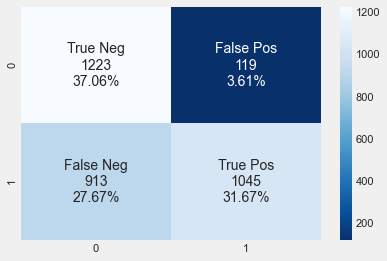

In [63]:
plt.figure(figsize=(6, 4))

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues_r')
plt.savefig('../picture/confussion_matrix.png', tight_box=True)

### 7.5.2 Feature Importance

Menggunakan modell yang tidak dituning

In [64]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict & Evaluation
y_pred = model.predict(X_test)#Check performa dari model
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.69
Precision (Test Set): 0.88
Recall (Test Set): 0.54
F1-Score (Test Set): 0.67
AUC: 0.719


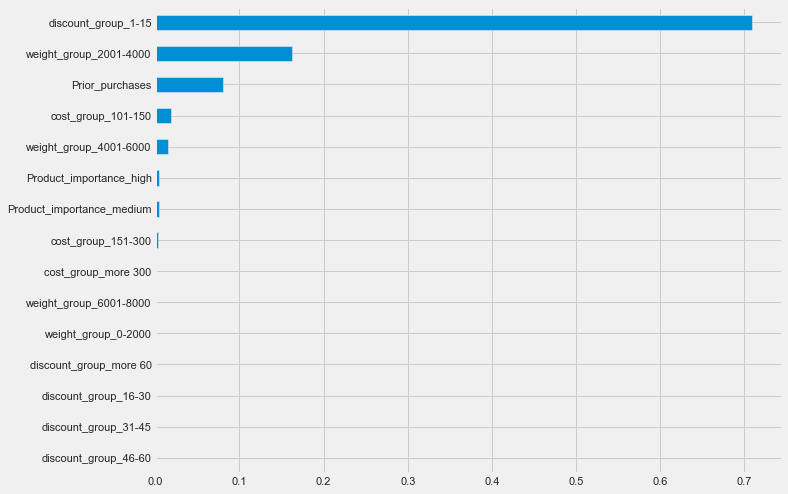

In [65]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(20).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()
plt.savefig('../picture/feature_importance.png', tight_box=True)

## 7.6 Cross Validation

In [66]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

kfold = model_selection.KFold(n_splits=10, random_state=1, shuffle=True)

# Get score:
results_k = model_selection.cross_val_score(dt, X, y, cv=kfold, scoring='roc_auc')
results_k

array([0.73308824, 0.69831547, 0.7168    , 0.71163603, 0.72060958,
       0.70416025, 0.7194745 , 0.70061256, 0.7143928 , 0.71879815])

In [67]:
from sklearn.model_selection import StratifiedKFold

roc_auc_list = []
roc_auc_holdout = []
roc_auc_train = []
folds = []
model = DecisionTreeClassifier(max_depth=20)
kfold = KFold(n_splits=10, random_state=42, shuffle=True)
for i, (train_index, test_index) in enumerate(kfold.split(X_train)):
    X1_train, X1_valid = X.iloc[train_index], X.iloc[test_index]
    y1_train, y1_valid = y[train_index], y[test_index]
    model.fit(X1_train, y1_train)
    train_pred = model.predict_proba(X1_train)[:,1] # 70%
    #Measure of the fit of your model.
    pred = model.predict_proba(X1_valid)[:,1] # 10%
    # DATA WHICH MODEL HAS NOT SEEN
    pred_holdout = model.predict_proba(X_test)[:,1] # 20%
    
    print('Prediction length on validation set, DecisionTree Classifier, fold ', i, ': ', len(pred))

    folds.append(i)
    roc_auc_list.append(roc_auc_score(y1_valid, pred))
    roc_auc_holdout.append(roc_auc_score(y_test, pred_holdout))
    roc_auc_train.append(roc_auc_score(y1_train, train_pred))

Prediction length on validation set, DecisionTree Classifier, fold  0 :  770
Prediction length on validation set, DecisionTree Classifier, fold  1 :  770
Prediction length on validation set, DecisionTree Classifier, fold  2 :  770
Prediction length on validation set, DecisionTree Classifier, fold  3 :  770
Prediction length on validation set, DecisionTree Classifier, fold  4 :  770
Prediction length on validation set, DecisionTree Classifier, fold  5 :  770
Prediction length on validation set, DecisionTree Classifier, fold  6 :  770
Prediction length on validation set, DecisionTree Classifier, fold  7 :  770
Prediction length on validation set, DecisionTree Classifier, fold  8 :  770
Prediction length on validation set, DecisionTree Classifier, fold  9 :  769


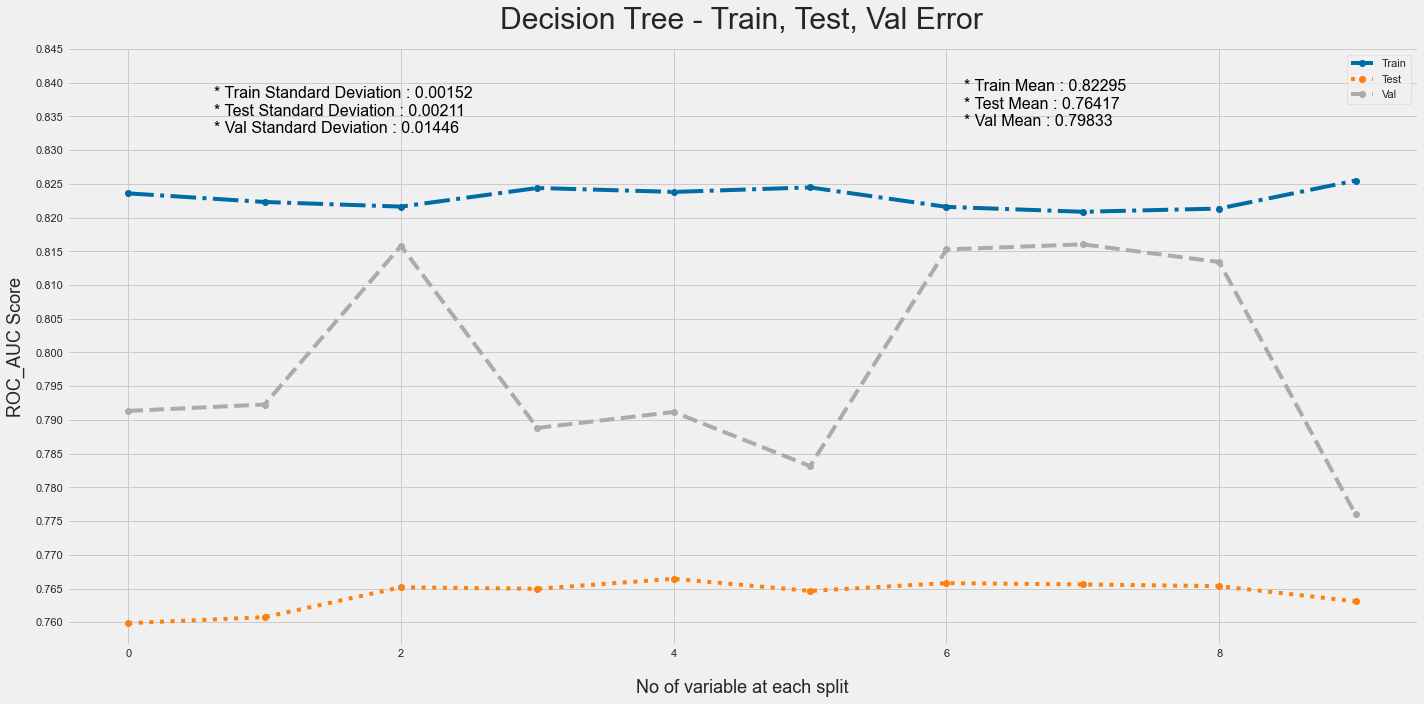

<Figure size 1490.4x595.44 with 0 Axes>

In [68]:
rg = np.arange(0.760,0.850,0.005)

train_mean = np.mean(roc_auc_train)
test_mean = np.mean(roc_auc_holdout)
val_mean = np.mean(roc_auc_list)

train_std = np.std(roc_auc_train)
test_std = np.std(roc_auc_holdout)
val_std = np.std(roc_auc_list)

plt.style.use('tableau-colorblind10')

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(roc_auc_train, label='Train', marker='o', linestyle='-.')
ax.plot(roc_auc_holdout, label='Test', marker='o', linestyle=':')
ax.plot(roc_auc_list, label='Val', marker='o', linestyle='--')

text_m = '''
    * Train Mean : ''' + str(format(train_mean, '.5f')) + '''
    * Test Mean : ''' + str(format(test_mean, '.5f')) + ''' 
    * Val Mean : ''' + str(format(val_mean, '.5f')) + '''     
'''

ax.text(6,0.831,text_m,horizontalalignment='left',color='black',fontsize=16,fontweight='normal')


text_s = '''
    * Train Standard Deviation : ''' + str(format(train_std, '.5f')) + '''
    * Test Standard Deviation : ''' + str(format(test_std, '.5f')) + ''' 
    * Val Standard Deviation : ''' + str(format(val_std, '.5f')) + '''     
'''

ax.text(0.5,0.830,text_s,horizontalalignment='left',color='black',fontsize=16,fontweight='normal')


ax.set_xlabel('No of variable at each split', fontsize=18, labelpad=20)
ax.set_ylabel('ROC_AUC Score', fontsize=18, labelpad=10)

ax.set_title('Decision Tree - Train, Test, Val Error', pad=20, fontsize=30)

ax.legend()
ax.set_yticks(rg)

sns.despine()

plt.tight_layout()

plt.show();

plt.savefig('../picture/cross_validation.png', tight_box=True)